In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,BatchNormalization,Dropout
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

train_x = np.array(train['ImageId'])
train_y = list(train['NameOfPokemon'])
train_y2 = np.array(train['NameOfPokemon'])

In [3]:
type(train_y)

list

In [4]:
test = np.array(test['ImageId'])

In [5]:
p = Path("./Images/")

dirs = p.glob("*")

image_data_train = []
image_data_test = []



In [6]:
for img in train_x:
    dirs = p.glob(img)
    for i in dirs:
        data = image.load_img(i,target_size=(64,64))
        image_array = image.img_to_array(data)
        image_data_train.append(image_array)
        

for img in test:
    dirs = p.glob(img)
    for i in dirs:
        data = image.load_img(i,target_size=(64,64))
        image_array = image.img_to_array(data)
        image_data_test.append(image_array)


C:\Users\GOLUZZ\Anaconda3\lib\site-packages\PIL\Image.py:888: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [132]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

#img = load_img('data/train/cats/cat.0.jpg')  # this is a PIL image
#x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
l = len(image_data_train)

for i in range(l):
    x = image_data_train[i]
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    j = 0
    for batch in datagen.flow(x, batch_size=1,save_to_dir='preview', save_prefix=train_y[i], save_format='jpg'):
        j += 1
        if j > 100:
            break  # otherwise the generator would loop indefinitely

In [7]:
p2 = Path("./preview/")

dirs = p2.glob("*")

for img in dirs:
    lab = str(img).split("\\")[1].split("_")[0]
    train_y.append(lab)
    img2 = image.load_img(img,target_size=(64,64))
    img2_array = image.img_to_array(img2)
    image_data_train.append(img2_array)

        
train_y = np.array(train_y)

In [8]:
image_data_train = np.array(image_data_train,dtype='float32')/255.0
image_data_test = np.array(image_data_test,dtype='float32')/255.0
print(image_data_train.shape)
print(train_y.shape)

(19521, 64, 64, 3)
(19521,)


Pikachu


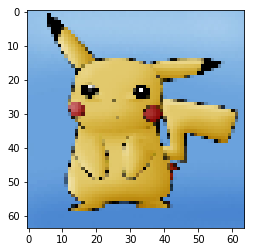

Pikachu


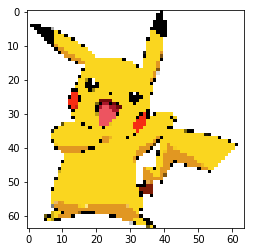

Pikachu


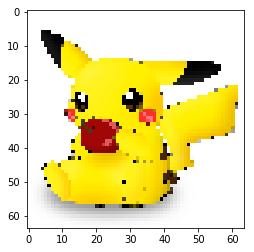

Pikachu


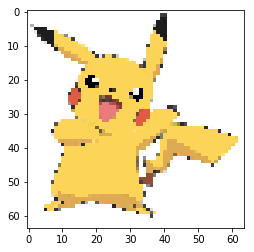

Pikachu


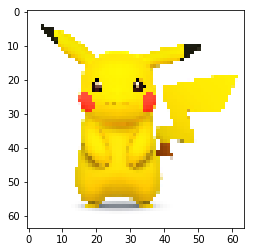

In [9]:
for i in range(5):
    plt.imshow(image_data_train[i])
    print(train_y[i])
    plt.show()

In [10]:
import random 

combined = list(zip(image_data_train,train_y))
random.shuffle(combined)

image_data_train[:], train_y[:] = zip(*combined)

Charmander


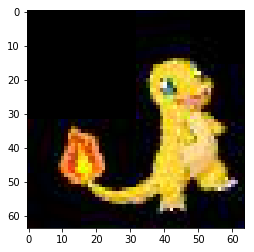

Bulbasaur


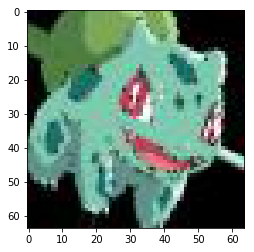

Charmander


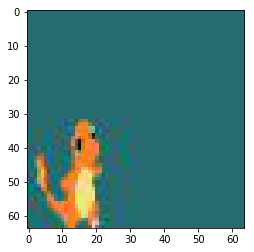

Bulbasaur


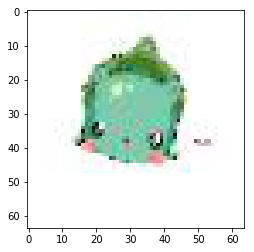

Pikachu


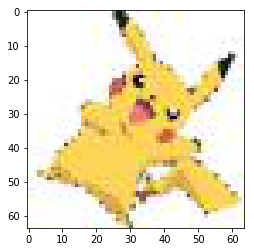

In [11]:
for i in range(5):
    plt.imshow(image_data_train[i])
    print(train_y[i])
    plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

le1 = LabelEncoder()
le2 = LabelEncoder()

train_y2 = train_y

train_y = le1.fit_transform(train_y)
train_y2 = le2.fit_transform(train_y2)

train_y = to_categorical(train_y)
train_y[0]

array([ 0.,  1.,  0.], dtype=float32)

# CNN Model

In [139]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu',strides = 1, padding = "same", input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3),strides = 2, padding = "same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3),strides = 2, padding = "same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation = 'softmax'))

In [140]:
model.compile(optimizer=Adam(lr=0.00005),loss='categorical_crossentropy',metrics=['accuracy'])

In [141]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 8, 8, 64)          256       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 96)          55392     
__________

In [144]:
model.fit(image_data_train,train_y,epochs = 50)

Epoch 1/50
19521/19521 [==============================] - 9s 484us/step - loss: 0.5688 - acc: 0.6564
Epoch 2/50
19521/19521 [==============================] - 9s 482us/step - loss: 0.5706 - acc: 0.6570
Epoch 3/50
19521/19521 [==============================] - 10s 500us/step - loss: 0.5669 - acc: 0.6597
Epoch 4/50
19521/19521 [==============================] - 10s 521us/step - loss: 0.5664 - acc: 0.6585
Epoch 5/50
19521/19521 [==============================] - 10s 521us/step - loss: 0.5643 - acc: 0.6589
Epoch 6/50
19521/19521 [==============================] - 10s 519us/step - loss: 0.5669 - acc: 0.6578
Epoch 7/50
19521/19521 [==============================] - 10s 520us/step - loss: 0.5647 - acc: 0.6611
Epoch 8/50
19521/19521 [==============================] - 10s 519us/step - loss: 0.5656 - acc: 0.6581
Epoch 9/50
19521/19521 [==============================] - 10s 520us/step - loss: 0.5638 - acc: 0.6633
Epoch 10/50
19521/19521 [==============================] - 10s 523us/step - loss: 0.

In [145]:
predictions = model.predict(image_data_test)

In [146]:
predictions.shape

(123, 3)

In [147]:
predictions[0]

array([ 0.8131268 ,  0.00176047,  0.18511274], dtype=float32)

In [148]:
# dictt = {
#     0 : "Pikachu",
#     1 : "Bulbasaur",
#     2 : "Charmander"
# }

In [149]:
final = []

for i in predictions:
    idx = np.argmax(i)
    final.append(idx)

In [150]:
final = le.inverse_transform(final)
final[:5]

array(['Bulbasaur', 'Charmander', 'Charmander', 'Charmander', 'Pikachu'], dtype=object)

In [151]:
f = pd.DataFrame(data = final, columns = ["NameOfPokemon"])
f.head()

,NameOfPokemon
0,Bulbasaur
1,Charmander
2,Charmander
3,Charmander
4,Pikachu


In [152]:
f_sub = pd.read_csv("test.csv")
f_sub["NameOfPokemon"] = f
f_sub.to_csv("final.csv", index = False)

In [164]:
a = image_data_train.reshape(304,-1)
a.shape

(304, 30000)

In [169]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV

print(type(train_y2))
# clf= SVC()
# grid={'C':[1e2,1e4,1e1,5e3,1e3,5e2],'gamma':[1e-3,1e-2,5e-3,5e-2,1e-4,1e-5]}
# abc=GridSearchCV(clf,grid)
# abc.fit(image_data_train.reshape(304,-1),train_y2)

<class 'numpy.ndarray'>


In [ ]:
#abc.best_estimator_
cls = SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
cls.fit(image_data_train.reshape(19521,-1),train_y2)
pre = cls.predict(image_data_test.reshape(123,-1))
p = le2.inverse_transform(pre)
p

In [217]:
f_sub = pd.read_csv("test.csv")
f_sub["NameOfPokemon"] = pre
f_sub.to_csv("final2.csv", index = False)

In [13]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=201)
clf.fit(image_data_train.reshape(19521,-1),train_y2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=201, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
preRF = clf.predict(image_data_test.reshape(123,-1))

In [16]:
pRF = le2.inverse_transform(preRF)
pRF

array(['Bulbasaur', 'Charmander', 'Bulbasaur', 'Charmander', 'Pikachu',
       'Pikachu', 'Pikachu', 'Bulbasaur', 'Bulbasaur', 'Charmander',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Charmander',
       'Charmander', 'Charmander', 'Charmander', 'Pikachu', 'Charmander',
       'Pikachu', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Charmander',
       'Charmander', 'Bulbasaur', 'Pikachu', 'Pikachu', 'Pikachu',
       'Pikachu', 'Pikachu', 'Charmander', 'Bulbasaur', 'Pikachu',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Charmander', 'Bulbasaur',
       'Bulbasaur', 'Charmander', 'Pikachu', 'Pikachu', 'Charmander',
       'Bulbasaur', 'Charmander', 'Bulbasaur', 'Charmander', 'Charmander',
       'Pikachu', 'Charmander', 'Pikachu', 'Bulbasaur', 'Charmander',
       'Bulbasaur', 'Charmander', 'Pikachu', 'Charmander', 'Charmander',
       'Charmander', 'Pikachu', 'Charmander', 'Pikachu', 'Pikachu',
       'Pikachu', 'Bulbasaur', 'Charmander', 'Pikachu', 'Bulbasaur',
       '

In [18]:
f_sub = pd.read_csv("test.csv")
f_sub["NameOfPokemon"] = pRF
f_sub.to_csv("finalRF.csv", index = False)

In [239]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(image_data_train.reshape(19521,-1),train_y2)
p  = clf.predict(image_data_test.reshape(123,-1))
p = le.inverse_transform(p)
p

array(['Bulbasaur', 'Charmander', 'Charmander', 'Pikachu', 'Charmander',
       'Bulbasaur', 'Pikachu', 'Charmander', 'Pikachu', 'Pikachu',
       'Pikachu', 'Pikachu', 'Pikachu', 'Charmander', 'Bulbasaur',
       'Charmander', 'Charmander', 'Charmander', 'Pikachu', 'Pikachu',
       'Pikachu', 'Pikachu', 'Charmander', 'Pikachu', 'Pikachu',
       'Bulbasaur', 'Pikachu', 'Bulbasaur', 'Charmander', 'Bulbasaur',
       'Pikachu', 'Bulbasaur', 'Bulbasaur', 'Pikachu', 'Bulbasaur',
       'Bulbasaur', 'Pikachu', 'Bulbasaur', 'Charmander', 'Bulbasaur',
       'Charmander', 'Charmander', 'Bulbasaur', 'Charmander', 'Bulbasaur',
       'Pikachu', 'Bulbasaur', 'Pikachu', 'Charmander', 'Charmander',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Pikachu', 'Charmander',
       'Pikachu', 'Bulbasaur', 'Pikachu', 'Bulbasaur', 'Pikachu',
       'Bulbasaur', 'Pikachu', 'Charmander', 'Pikachu', 'Pikachu',
       'Pikachu', 'Pikachu', 'Charmander', 'Pikachu', 'Pikachu',
       'Charmander', 'Bulbasaur',

In [222]:
f_sub = pd.read_csv("test.csv")
f_sub["NameOfPokemon"] = p
f_sub.to_csv("finalL.csv", index = False)

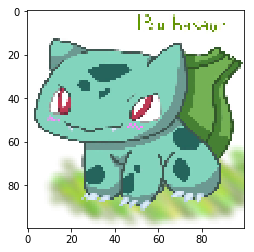

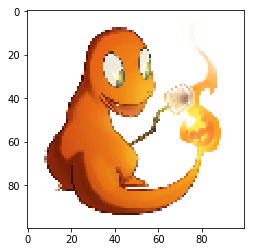

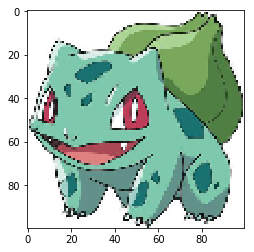

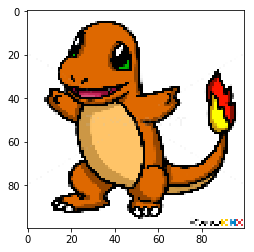

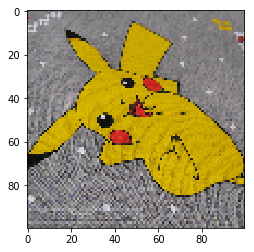

In [187]:
for i in range(5):
    plt.imshow(image_data_test[i])
    plt.show()